## Implementation of [Hierarchical Causal Models](https://arxiv.org/abs/2401.05330) (Weinstein and Blei, 2024)

In [1]:
from IPython.display import SVG

from y0.dsl import Variable
from y0.hierarchical import HCM_from_lists, augment_collapsed_model, collapse_HCM

# Figure 2 

## Confounder

Create the hierarchical causal model (HCM) in pygraphviz

Figure 2 (a)

In [2]:
confounder_hcm = HCM_from_lists(
    obs_subunits=["A", "Y"], unobs_units=["U"], edges=[("U", "A"), ("A", "Y"), ("U", "Y")]
)
confounder_hcm.layout("dot")
confounder_hcm.draw("./images/confounder_HCM.svg")

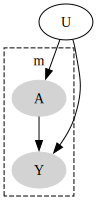

In [3]:
SVG("./images/confounder_HCM.svg")

Create the collapsed model as an NxMixedGraph  
(note that the paper displays latent variables but here we use semiMarkov graphs with latent variable connections represented by undirected edges)

Figure 2 (c)

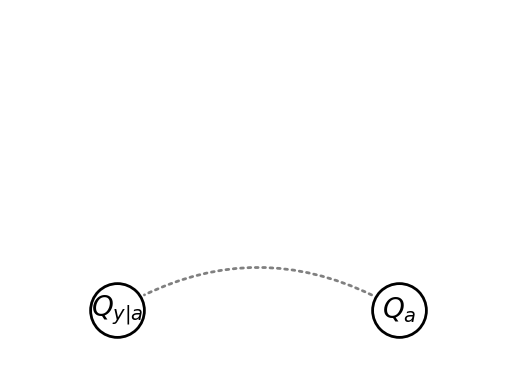

In [4]:
confounder_collapsed = collapse_HCM(confounder_hcm)
confounder_collapsed.draw()

Augment the collapsed model with new $Q_y$ variable and its mechanism $Q_y = m(Q_{y|a}, Q_a)$ from $\Pr(Y) = \Pr(Y | A) \Pr(A)$

Figure 2 (d)

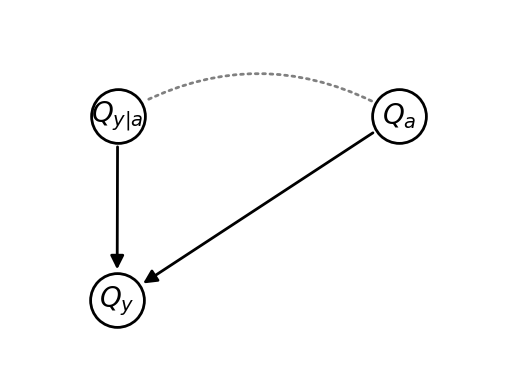

In [5]:
confounder_augmented = augment_collapsed_model(
    confounder_collapsed, Variable("Q_y"), (Variable("Q_{y|a}"), Variable("Q_a"))
)
confounder_augmented.draw()

## Confounder and Interference

Create the HCM in pygraphviz

Figure 2 (e)

In [6]:
conf_and_int_hcm = HCM_from_lists(
    obs_subunits=["A", "Y"],
    obs_units=["Z"],
    unobs_units=["U"],
    edges=[("U", "A"), ("A", "Y"), ("U", "Y"), ("A", "Z"), ("Z", "Y")],
)
conf_and_int_hcm.layout("dot")
conf_and_int_hcm.draw("./images/confounder_and_interference_HCM.svg")

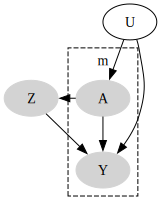

In [7]:
SVG("./images/confounder_and_interference_HCM.svg")

Create the collapsed model as an NxMixed Graph

Figure 2 (g)

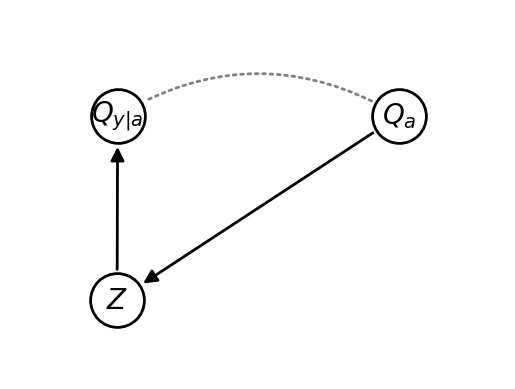

In [8]:
conf_and_int_collapsed = collapse_HCM(conf_and_int_hcm)
conf_and_int_collapsed.draw()

Augment the collapsed model with new variable $Q_y$ and its mechanism $Q_y = m(Q_{y|a}, Q_a)$ from $\Pr(Y) = \Pr(Y|A) \Pr(A)$

Figure 2 (h)

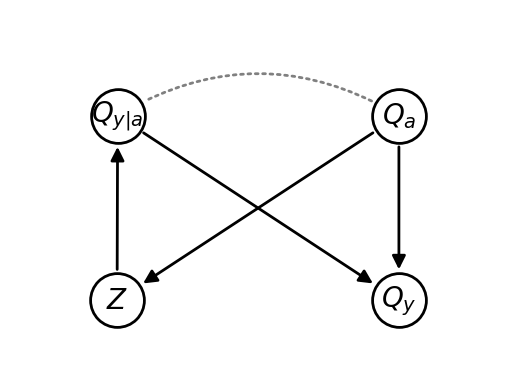

In [9]:
conf_and_int_augmented = augment_collapsed_model(
    conf_and_int_collapsed, Variable("Q_y"), (Variable("Q_{y|a}"), Variable("Q_a"))
)
conf_and_int_augmented.draw()

## Instrument

Create the HCM in pygraphviz

Figure 2 (i)

In [10]:
instrument_hcm = HCM_from_lists(
    obs_subunits=["A", "Z"],
    obs_units=["Y"],
    unobs_units=["U"],
    edges=[("Z", "A"), ("A", "Y"), ("U", "Y"), ("U", "A")],
)
instrument_hcm.layout("dot")
instrument_hcm.draw("./images/instrument_HCM.svg")

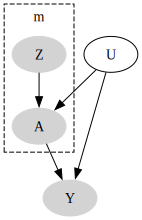

In [11]:
SVG("./images/instrument_HCM.svg")

Create the collapsed model as an NxMixedGraph

Figure 2 (k)

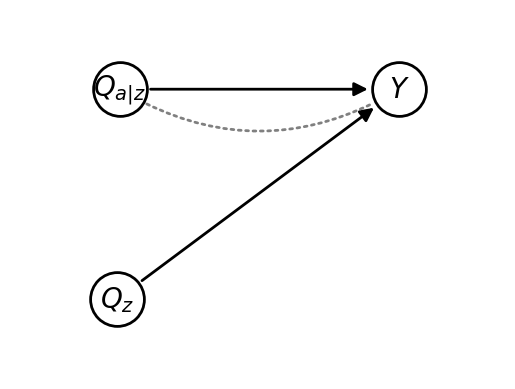

In [12]:
instrument_collapsed = collapse_HCM(instrument_hcm)
instrument_collapsed.draw()

Augment the collapsed model with new variable $Q_a$ and its mechanism $Q_a = m(Q_{a|z}, Q_z)$ from $\Pr(A) = \Pr(A|Z) \Pr(Z)$

Figure A2

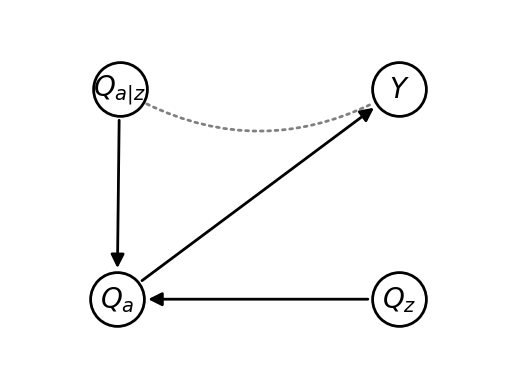

In [13]:
instrument_augmented = augment_collapsed_model(
    instrument_collapsed, Variable("Q_a"), (Variable("Q_{a|z}"), Variable("Q_z"))
)
instrument_augmented.draw()